In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\\3101\\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


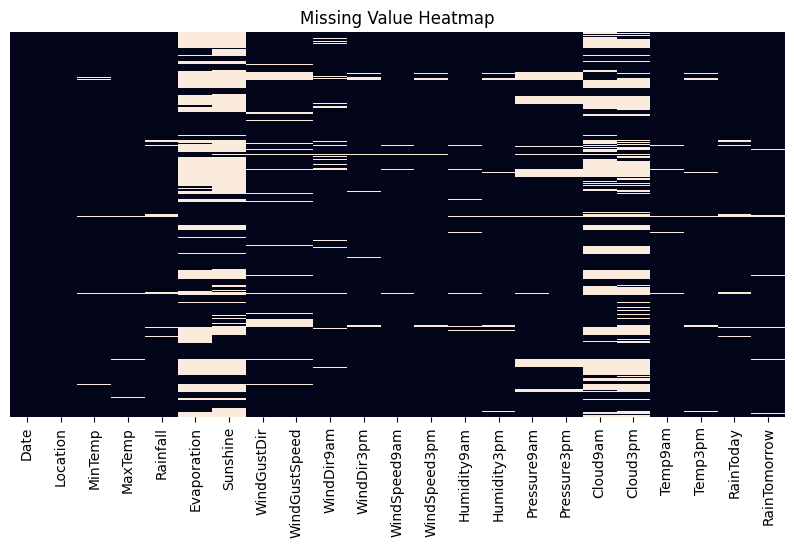

In [239]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

In [240]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [241]:
df.dropna(subset=["RainTomorrow"], inplace=True)
df["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

In [242]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df.drop("Date", axis=1, inplace=True)

In [243]:
df.columns = df.columns.str.strip()

In [244]:
print("Columns available:", df.columns.tolist())

Columns available: ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month']


In [245]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df["RainTomorrow"].unique()

array([0, 1])

Feature correlation with target:

RainTomorrow     1.000000
Sunshine         0.450768
Humidity3pm      0.446160
Cloud3pm         0.381870
Cloud9am         0.317380
RainToday        0.309652
Humidity9am      0.257161
Pressure9am      0.246371
Rainfall         0.239032
WindGustSpeed    0.234010
Pressure3pm      0.226031
Temp3pm          0.192424
MaxTemp          0.159237
Evaporation      0.119285
WindSpeed9am     0.090995
WindSpeed3pm     0.087817
MinTemp          0.083936
WindGustDir      0.054488
WindDir3pm       0.034435
Temp9am          0.025691
WindDir9am       0.018436
Month            0.007328
Location         0.003579
Name: RainTomorrow, dtype: float64


C:\Users\ZBOOK\AppData\Local\Temp\ipykernel_6752\2358792056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


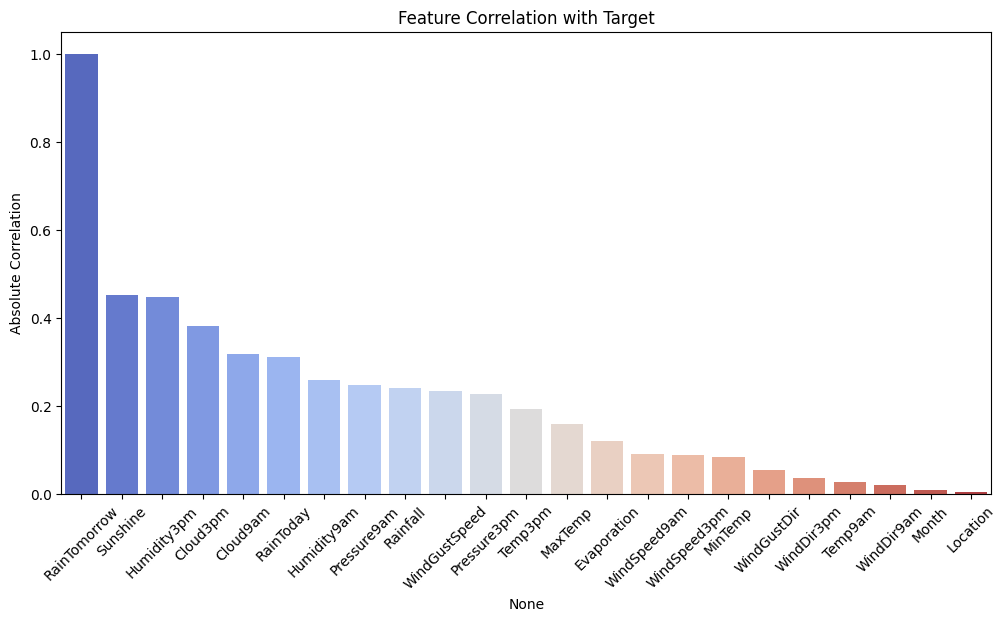

In [ ]:
target = "RainTomorrow"
target_corr = df.corr(numeric_only=True)[target].abs().sort_values(ascending=False)

# Show values
print("Feature correlation with target:\n")
print(target_corr)

# Plot graph
plt.figure(figsize=(12,6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.title("Feature Correlation with Target")
plt.ylabel("Absolute Correlation")
plt.xticks(rotation=45)
plt.show()

In [247]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
Month                0
dtype: int64

In [248]:
df.drop(columns=["WindGustDir", "Evaporation"], inplace=True)

print("Columns after drop:", df.columns)


Columns after drop: Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')


In [249]:
df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2,13.4,22.9,0.6,NaN,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,12
1,2,7.4,25.1,0.0,NaN,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,12


In [250]:
# Fill categorical columns with mode
categorical_cols = ["WindDir9am", "WindDir3pm", "RainToday"]

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


# Median fill for continuous numeric columns
median_cols = ["MinTemp", "MaxTemp", "Rainfall", "Sunshine", "WindGustSpeed", 
               "WindSpeed9am", "WindSpeed3pm", "Temp9am", "Temp3pm"]
for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Nearest (forward fill) for sequence dependent columns
nearest_cols = ["Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm"]
for col in nearest_cols:
    df[col].fillna(method="ffill", inplace=True)   # forward fill
    df[col].fillna(method="bfill", inplace=True)   # backward fill (if first row is null)


C:\Users\ZBOOK\AppData\Local\Temp\ipykernel_6752\84024443.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ZBOOK\AppData\Local\Temp\ipykernel_6752\84024443.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [251]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

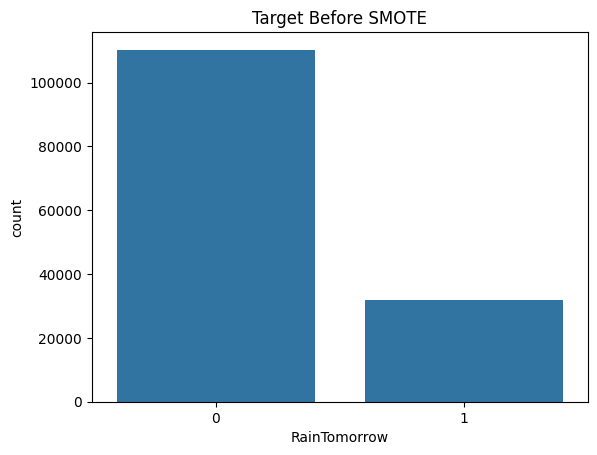

In [252]:
sns.countplot(x=df["RainTomorrow"])
plt.title("Target Before SMOTE")
plt.show()

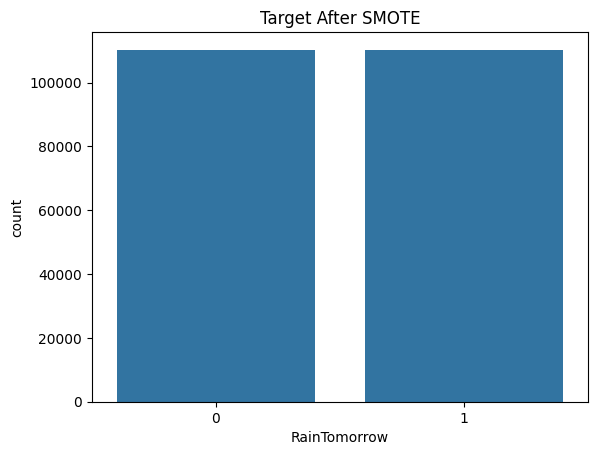

In [253]:
from imblearn.over_sampling import SMOTE

X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

sns.countplot(x=y)
plt.title("Target After SMOTE")
plt.show()


In [254]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=500,       # typical iteration for convergence
        random_state=42
    ),
    
    "KNN": KNeighborsClassifier(
        n_neighbors=5,      # common default
        algorithm='auto',   
        metric='minkowski',
        p=2
    ),
    
    "Decision Tree": DecisionTreeClassifier(
        max_depth=12,       # control tree depth
        min_samples_split=5,
        random_state=42
    ),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=100,   # number of trees
        max_depth=14,       # depth control
        random_state=42
    ),
    
    "Naive Bayes": GaussianNB(
        var_smoothing=1e-9  # default for stability
    ),
    
    "SVM": SVC( 
        kernel='rbf',       # commonly used kernel
        gamma='scale',
        random_state=42
    )
}



In [256]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    results.append([
        name,
        accuracy_score(y_test, pred),
        precision_score(y_test, pred),
        recall_score(y_test, pred),
        f1_score(y_test, pred)
    ])

result_df = pd.DataFrame(
    results, columns=["Model","Accuracy","Precision","Recall","F1"]
)

print(result_df.sort_values("Accuracy", ascending=False))


                 Model  Accuracy  Precision    Recall        F1
3        Random Forest  0.866408   0.866621  0.866111  0.866366
1                  KNN  0.854216   0.804773  0.935322  0.865150
5                  SVM  0.831101   0.830663  0.831755  0.831208
2        Decision Tree  0.828404   0.842950  0.807189  0.824682
0  Logistic Regression  0.779296   0.786818  0.766170  0.776357
4          Naive Bayes  0.739117   0.777526  0.669900  0.719712


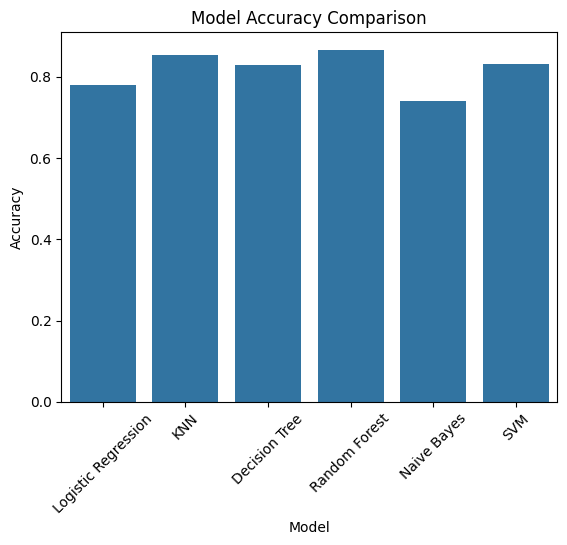

In [257]:
sns.barplot(data=result_df, x="Model", y="Accuracy")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()
